In [91]:
%load_ext autoreload
%autoreload 2

import os
import dosma as dm
import nibabel as nib
import matplotlib.pyplot as plt  
import numpy as np
import subprocess
import pickle
import pandas as pd

from dosma.scan_sequences import QDess
from dosma import ImageDataFormat

from utils.convert_qdess_dicom2nii import *
from utils.dosma_segmentation_bone_cartilage import *
from utils.append_df_to_excel import *
from utils.filter_qmaps import *
from utils.difference_map_tissue import *
from utils.apply_intensity_threshold import *
from utils.apply_volume_threshold import *
from utils.compute_t2_DODGR import *

from utils.sgd_based_registration import *
from utils.sgd_based_qmap_registration import *
from utils.dosma_segmentation import *
from utils.compute_DSC import *
from utils.compute_intensity_threshold import *
from utils.compute_volume_threshold import * 
from utils.compute_T2C_metrics import *
from utils.append_df_to_excel import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
os.environ['DIR']= '/dataNAS/people/anoopai/DODGR'
os.environ['DATA_DICOM']= '/dataNAS/people/anoopai/DODGR/DODGR_data_dicom'
os.environ['DATA']= '/dataNAS/people/anoopai/DODGR/DODGR_data'
os.environ['FILES']= '/dataNAS/people/anoopai/DODGR/code/files'
os.environ['REG']= '/dataNAS/people/anoopai/DODGR/reg'
os.environ['RESULTS'] = '/dataNAS/people/anoopai/DODGR/results'

# Change working directory to the directory containing data
dir_path = os.environ['DIR']
dicom_data_path = os.environ['DATA_DICOM']
data_path = os.environ['DATA']
files_path = os.environ['FILES']
reg_path = os.environ['REG']
results_path = os.environ['RESULTS']

In [ ]:
# ##############################################################################################################################################
# # Perform Automatic segmentation: Femoral Cartilage, Medial and Lateral Tibial Cartilage, Patellar Cartilage, Meniscus, Femur, Tibia, Patella
# # Note: Requires GPU
# ##############################################################################################################################################
# for sub_dir in os.listdir(dicom_data_path):
#     sub_dir_path = os.path.join(dicom_data_path, sub_dir)
#     sub_dir_path2 = os.path.join(data_path, sub_dir)
#     if not os.path.exists(sub_dir_path2):
#         os.makedirs(sub_dir_path2)
#     for data_dir in os.listdir(sub_dir_path):
#         data_dir_path = os.path.join(sub_dir_path, data_dir)
#         data_dir_path2 = os.path.join(sub_dir_path2, f'{data_dir}/qdess')
#         if not os.path.exists(data_dir_path2):
#             os.makedirs(data_dir_path2)
#         if not os.path.exists(data_dir_path2):
#             convert_qdess_dicom2nii(data_dir_path, data_dir_path2)
#         else:
#             print(f'{data_dir_path2} already exists')

In [ ]:
# weights_path = os.path.join(files_path, '/weights/StanfordQDessBoneUNet2D_model_weights.h5')


# for sub_dir in os.listdir(data_path):
#     print(type(data_path))
#     sub_dir_path = os.path.join(data_path, sub_dir)
#     print(sub_dir)
#     for session_dir in os.listdir(sub_dir_path):
#         session_path = os.path.join(sub_dir_path, session_dir)
#         qdess_path = os.path.join(session_path, 'qdess')
#         seg_path = os.path.join(session_path, 'segmentation.nii')
#         if not os.path.exists(seg_path):
#             print(f'Segmenting {qdess_path}')
#             # dosma_segmentation_bone_cartilage(
#             #         qdess_file_path = qdess_path,
#             #         output_file_name = seg_path,
#             #         weights_path = weights_path)
#         else:
#             print(f'{seg_path} already exists')

In [ ]:
# # remove files
# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
#     for session_dir in os.listdir(sub_dir_path):
#         session_path = os.path.join(sub_dir_path, session_dir)
#         qdess_path = os.path.join(session_path, 'qdess')
#         seg_path = os.path.join(session_path, 'segmentation.nii')
#         if os.path.exists(seg_path):
#             os.remove(seg_path)
#         else:
#             print(f'{seg_path} does not exist')

In [ ]:
# Save FC label from segmention.nii 
# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
#     for session_dir in os.listdir(sub_dir_path):
#         session_path = os.path.join(sub_dir_path, session_dir)
#         qdess_path = os.path.join(session_path, 'qdess')
#         seg_path = os.path.join(session_path, 'segmentation.nii')
#         seg_save_path = os.path.join(session_path, 'segmentation_fc.nii')
#         if os.path.exists(seg_path) and not os.path.exists(seg_save_path):
#             seg = nib.load(seg_path)
#             fc_seg = np.where(seg.get_fdata() == 2, 1, 0).astype(float)
#             seg_nii = nib.Nifti1Image(fc_seg, seg.affine)
#             print(seg_save_path)
#             nib.save(seg_nii, seg_save_path)

In [ ]:
# ##############################################################################################################################################
# # Step 4: SGD-based registration of follow-up scans to baseline scans
# # Conda activate dess
# ##############################################################################################################################################

# elastix_file_path = os.path.join(files_path, 'elastic_parameters/elastix_registration_parameters_SDF_mask.txt')

# # idensify baseline and follow-up scans for ACLR and contralateral legs
# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
#     print(sub_dir)
    
#     session_dirs= os.listdir(sub_dir_path)
    
#     for session_dir in session_dirs:
#         if 'IDX_bsln' in session_dir:
#             idx_bsln_dir_path = os.path.join(sub_dir_path, session_dir)
#         elif 'IDX_6mo' in session_dir:
#             idx_fup_dir_path = os.path.join(sub_dir_path, session_dir)
#         elif 'CL_bsln' in session_dir:
#             cl_bsln_dir_path = os.path.join(sub_dir_path, session_dir)
#         elif 'CL_6mo' in session_dir:
#             cl_fup_dir_path = os.path.join(sub_dir_path, session_dir)
            
#     idx_bsln_qdess_path = os.path.join(idx_bsln_dir_path, 'qdess')
#     idx_bsln_seg_path = os.path.join(idx_bsln_dir_path, 'segmentation_fc.nii')
    
#     idx_fup_qdess_path = os.path.join(idx_fup_dir_path, 'qdess')
#     idx_fup_qdess_reg_path = os.path.join(idx_fup_dir_path, 'qdess_reg')
#     idx_fup_seg_path = os.path.join(idx_fup_dir_path, 'segmentation_fc.nii')
    
#     cl_bsln_qdess_path = os.path.join(cl_bsln_dir_path, 'qdess')
#     cl_bsln_seg_path = os.path.join(cl_bsln_dir_path, 'segmentation_fc.nii')
    
#     cl_fup_qdess_path = os.path.join(cl_fup_dir_path, 'qdess')
#     cl_fup_qdess_reg_path = os.path.join(cl_fup_dir_path, 'qdess_reg')
#     cl_fup_seg_path = os.path.join(cl_fup_dir_path, 'segmentation_fc.nii')
    
#     print(f'Registering 6mo to bsln for IDX leg of {sub_dir}')
#     sgd_based_registration(
#     fixed_img_path = idx_bsln_qdess_path,
#     moving_img_path = idx_fup_qdess_path,
#     moving_img_save_path = idx_fup_qdess_reg_path,
#     fixed_mask_path = idx_bsln_seg_path,
#     moving_mask_path = idx_fup_seg_path,
#     elastix_file_path = elastix_file_path,
#     reg_path = reg_path,  
#     reg_check = True  # if True, it will save the a jpg pciture of a random slice (n) of the segmentation mask of the fixed image overlayed on the registered moving image)
#     ) 
    
#     print(f'Registering 6mo to bsln for CL leg of {sub_dir}')
#     sgd_based_registration(
#     fixed_img_path = cl_bsln_qdess_path,
#     moving_img_path = cl_fup_qdess_path,
#     moving_img_save_path = cl_fup_qdess_reg_path,
#     fixed_mask_path = cl_bsln_seg_path,
#     moving_mask_path = cl_fup_seg_path,
#     elastix_file_path = elastix_file_path,
#     reg_path = reg_path, 
#     reg_check = True  # if True, it will save the a jpg pciture of a random slice (n) of the segmentation mask of the fixed image overlayed on the registered moving image)
#     )  

In [ ]:
# ##############################################################################################################################################
# # Step 5: Resegmentation: Perform Automatic re-segmentation: Femoral Cartilage, Medial and Lateral Tibial Cartilage, Patellar Cartilage, Meniscus, Femur, Tibia, Patella
# # Note: Requires GPU
# # conda activate dosma2
# ##############################################################################################################################################

# weights_path = os.path.join(files_path, 'weights/best_model.h5')

# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
#     print(sub_dir_path)
#     for session_dir in os.listdir(sub_dir_path):
#         if '6mo' in session_dir:
#             session_path = os.path.join(sub_dir_path, session_dir)
#             qdess_path = os.path.join(session_path, 'qdess_reg')
#             seg_path = os.path.join(session_path, 'segmentation_reg.nii')
#             if not os.path.exists(seg_path):
#                 print(f'Segmenting {qdess_path}')
#                 dosma_segmentation_bone_cartilage(
#                         qdess_file_path = qdess_path,
#                         output_file_path = seg_path,
#                         weights_path = weights_path)
#             else:
#                 print(f'{seg_path} already exists')

In [ ]:
# ##############################################################################################################################################
# # Step 6: Save only FC segmentation as a seperate file for easy accessibility in the future
# # conda activate dess
# ##############################################################################################################################################
           
# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
#     for session_dir in os.listdir(sub_dir_path):
#         if '6mo' in session_dir:
#             session_path = os.path.join(sub_dir_path, session_dir)
#             seg_path = os.path.join(session_path, 'segmentation_reg.nii')
#             seg_save_path = os.path.join(session_path, 'segmentation_reg_fc.nii')
#             if os.path.exists(seg_path) and not os.path.exists(seg_save_path):
#                 seg = nib.load(seg_path)
#                 fc_seg = np.where(seg.get_fdata() == 2, 1, 0).astype(float)
#                 seg_nii = nib.Nifti1Image(fc_seg, seg.affine)
#                 print(f'Saving {seg_save_path}')
#                 nib.save(seg_nii, seg_save_path)
#             else:
#                 print(f'{seg_save_path} already exists')

In [ ]:
# # ##############################################################################################################################################
# # # Step 7: Compute Dice score between pre-registration baseline fc segmentation mask and [post-registration follow-up fc segmentation mask
# # # conda activate dess
# # ##############################################################################################################################################
# dsc_data_path = os.path.join(results_path, 'DSC_data.xlsx')
# dsc_data = pd.DataFrame(columns=['sub', 'Knee', 'DSC'])

# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
    
#     session_dirs= os.listdir(sub_dir_path)
    
#     idx_dirs= [dir for dir in session_dirs if 'IDX' in dir]
#     cl_dirs= [dir for dir in session_dirs if 'CL' in dir]
    
#     for session_dir in idx_dirs:
#         if 'bsln' in session_dir:
#             idx_bsln_dir_path = os.path.join(sub_dir_path, session_dir)
#         elif '6mo' in session_dir:
#             idx_fup_dir_path = os.path.join(sub_dir_path, session_dir)       
    
#     baseline_seg_path = os.path.join(idx_bsln_dir_path, 'segmentation_fc.nii')
#     followup_seg_path = os.path.join(idx_fup_dir_path, 'segmentation_reg_fc.nii')
    
#     baseline_seg = nib.load(baseline_seg_path).get_fdata()
#     followup_seg = nib.load(followup_seg_path).get_fdata()
    
#     DSC= compute_DSC(
#         mask1= baseline_seg,
#         mask2= followup_seg
#     )
    
#     sub= session_dir.split('_')[0]
#     knee= session_dir.split('_')[1]
#     visit= session_dir.split('_')[2]    
#     dsc_data = pd.concat([dsc_data, pd.DataFrame({'sub': sub, 'Knee': knee, 'DSC': DSC}, index=[0])], ignore_index=True)
#     print(dsc_data)
    
#     for session_dir in cl_dirs:
#         if 'bsln' in session_dir:
#             cl_bsln_dir_path = os.path.join(sub_dir_path, session_dir)
#         elif '6mo' in session_dir:
#             cl_fup_dir_path = os.path.join(sub_dir_path, session_dir)       
    
#     baseline_seg_path = os.path.join(cl_bsln_dir_path, 'segmentation_fc.nii')
#     followup_seg_path = os.path.join(cl_fup_dir_path, 'segmentation_reg_fc.nii')
    
#     baseline_seg = nib.load(baseline_seg_path).get_fdata()
#     followup_seg = nib.load(followup_seg_path).get_fdata()
    
#     DSC= compute_DSC(
#         mask1= baseline_seg,
#         mask2= followup_seg
#     )
    
#     sub= session_dir.split('_')[0]
#     knee= session_dir.split('_')[1]
#     visit= session_dir.split('_')[2]
#     dsc_data = pd.concat([dsc_data, pd.DataFrame({'sub': sub, 'Knee': knee, 'DSC': DSC}, index=[0])], ignore_index=True)
    
    
# append_df_to_excel(data=dsc_data, data_file_path=dsc_data_path, sheet='DSC_data')

In [ ]:
# load data and show rows with DSC < 0.75

dsc_data = pd.read_excel(dsc_data_path, sheet_name='DSC_data')
print(dsc_data[dsc_data['DSC'] < 0.75])

In [ ]:
# ##############################################################################################################################################
# # Step 8: Compute t2 maps
# ##############################################################################################################################################
for sub_dir in os.listdir(data_path):
    sub_dir_path = os.path.join(data_path, sub_dir)
    
    session_dirs= os.listdir(sub_dir_path)
    
    for session_dir in session_dirs:
        
        if 'bsln' in session_dir:
            print(session_dir)
            session_path = os.path.join(sub_dir_path, session_dir)
            qdess_path = os.path.join(session_path, 'qdess')
            mask_path = os.path.join(session_path, 'segmentation_fc.nii')
            t2_save_path = os.path.join(session_path, 't2')
            if not os.path.exists(t2_save_path):
                compute_t2_DODGR(qdess_path, mask_path, t2_save_path, lateral2medial= True)
            else:
                print(f'{t2_save_path} already exists')

        elif '6mo' in session_dir:
            print(session_dir)
            session_path = os.path.join(sub_dir_path, session_dir)
            qdess_path = os.path.join(session_path, 'qdess_reg')
            mask_path = os.path.join(session_path, 'segmentation_reg_fc.nii')
            t2_save_path = os.path.join(session_path, 't2')
            if not os.path.exists(t2_save_path):
                compute_t2_DODGR(qdess_path, mask_path, t2_save_path, lateral2medial= True)
            else:
                print(f'{t2_save_path} already exists')


In [ ]:
# # ##############################################################################################################################################
# # # Step 8: Filter t2 Maps
# # ##############################################################################################################################################
# for sub_dir in os.listdir(data_path):
#     sub_dir_path = os.path.join(data_path, sub_dir)
    
#     session_dirs= os.listdir(sub_dir_path)
    
#     for session_dir in session_dirs:
#         print(session_dir)
#         session_path = os.path.join(sub_dir_path, session_dir)
#         t2_path = os.path.join(session_path, 't2/fc/t2/t2.nii.gz')
#         t2_filt_path = os.path.join(session_path, 't2/fc/t2/t2_filtered.nii.gz')
#         if not os.path.exists(t2_filt_path):
#             print(f'Filtering and saving T2 map.')
#             t2_filt = filter_qmaps(t2_path, fwhm= 1)
#             nib.save(t2_filt, t2_filt_path)
#         else:
#             print(f'{t2_filt_path} already exists')

In [ ]:
t2_filt_path = '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_CL_6mo_anon/t2/fc/t2/t2_filtered.nii.gz'
t2_path = '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_CL_6mo_anon/t2/fc/t2/t2.nii.gz'

t2 = nib.load(t2_path).get_fdata()
t2_filt = nib.load(t2_filt_path).get_fdata()

# Plot and check
n=45


fig1, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(t2[:,:,20], cmap = 'viridis')
ax[1].imshow(t2_filt[:,:,20], cmap = 'viridis')
# plt.axis('off')
# plt.colorbar()

In [ ]:
# ##############################################################################################################################################
# # Step 10: Compute Difference Maps
# ##############################################################################################################################################
for sub_dir in os.listdir(data_path):
    sub_dir_path = os.path.join(data_path, sub_dir)
    
    # session_dirs= os.listdir(sub_dir_path)
    
    idx_dirs= [dir for dir in os.listdir(sub_dir_path) if 'IDX' in dir]
    cl_dirs= [dir for dir in os.listdir(sub_dir_path) if 'CL' in dir]
    
    knee_dirs = [idx_dirs, cl_dirs]
    
    for knee_dir in knee_dirs:
        for session_dir in knee_dir:
            if 'bsln' in session_dir:
                idx_bsln_dir_path = os.path.join(sub_dir_path, session_dir)
            elif '6mo' in session_dir:
                idx_fup_dir_path = os.path.join(sub_dir_path, session_dir)       
        
        baseline_t2_path = os.path.join(idx_bsln_dir_path, 't2/fc/t2/t2_filtered.nii.gz')
        followup_t2_path = os.path.join(idx_fup_dir_path, 't2/fc/t2/t2_filtered.nii.gz')
        baseline_seg_path = os.path.join(idx_bsln_dir_path, 'segmentation_fc.nii')
        followup_seg_path = os.path.join(idx_fup_dir_path, 'segmentation_reg_fc.nii')
        difference_map_save_path = os.path.join(idx_fup_dir_path, 'difference_map.nii')
        
        if not os.path.exists(difference_map_save_path):
            
            print(f'Computing and saving difference map for {sub_dir}')
            
            # Compute and save difference map
            difference_map = difference_map_tissue(
                baseline_qmap_path= baseline_t2_path, 
                followup_qmap_path= followup_t2_path,
                baseline_mask_path=baseline_seg_path, 
                followup_mask_path= followup_seg_path, 
                mask_erode= False, 
                erode_size= 1)
            
            nib.save(difference_map, difference_map_save_path)
            
        else:
            print(f'Difference map for {sub_dir_path} already exists')

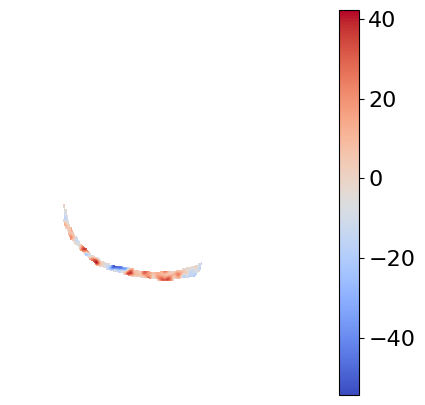

In [62]:
diff_map_path ='/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_IDX_6mo_anon/difference_map.nii'
diffmap = nib.load(diff_map_path)
n=45

data = diffmap.get_fdata()[100:350,100:350,n]
# vmin = -np.abs(data).max()
# vmax = np.abs(data).max()
fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.imshow(data, cmap='coolwarm')
plt.axis('off')
plt.colorbar()

In [45]:
np.unique(diffmap.get_fdata())

array([-54.68250361, -54.42962162, -54.31584288, ...,  54.65348603,
        54.75391378,          nan])

In [56]:
baseline_qmap_path= '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR003_anon/DODGR003_CL_bsln_anon/t2/fc/t2/t2_filtered.nii.gz'
baseline_mask_path = '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR003_anon/DODGR003_CL_bsln_anon/segmentation_fc.nii'

followup_qmap_path= '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR003_anon/DODGR003_CL_6mo_anon/t2/fc/t2/t2_filtered.nii.gz'
followup_mask_path = '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR003_anon/DODGR003_CL_6mo_anon/segmentation_reg_fc.nii'


import numpy as np
import nibabel as nib
from nibabel import Nifti1Image

from utils.difference_map import difference_map
from utils.erode import erode

# load the qmaps and masks
baseline_qmap = nib.load(baseline_qmap_path)
followup_qmap = nib.load(followup_qmap_path)
baseline_mask = nib.load(baseline_mask_path)
followup_mask = nib.load(followup_mask_path)


# convert to binary mask (1s and 0s, if labels are not 1)
baseline_mask_binary = np.where(baseline_mask.get_fdata() > 0, 1, 0)
followup_mask_binary = np.where(followup_mask.get_fdata() > 0, 1, 0)

baseline_nan = np.where(baseline_mask.get_fdata() == 1, baseline_qmap.get_fdata(), np.nan)
followup_nan = np.where(followup_mask.get_fdata() == 1, followup_qmap.get_fdata(), np.nan)

# Assume baseline and target are your input arrays
baseline_matched = np.where(np.isnan(followup_nan), np.nan, baseline_nan)
followup_matched = np.where(np.isnan(baseline_nan), np.nan, followup_nan)

# Perform the subtraction
difference_map2 = followup_matched - baseline_matched


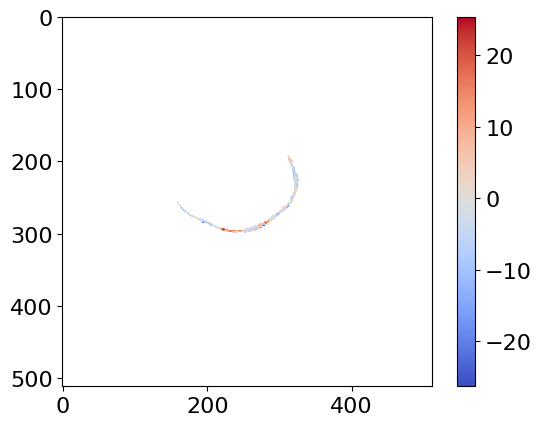

In [59]:
# c = baseline_nan - followup_nan

plt.imshow(difference_map2[:,:,45], cmap= 'coolwarm')
plt.colorbar()

In [ ]:
# ##############################################################################################################################################
# # Step 11: Apply intensity threshold to difference maps
# ##############################################################################################################################################
print('Applying intensity threshold to difference maps')
for sub_dir in os.listdir(data_path):
    sub_dir_path = os.path.join(data_path, sub_dir)
    
    # session_dirs= os.listdir(sub_dir_path)
    
    idx_dirs= [dir for dir in os.listdir(sub_dir_path) if 'IDX' in dir]
    cl_dirs= [dir for dir in os.listdir(sub_dir_path) if 'CL' in dir]
    
    knee_dirs = [idx_dirs, cl_dirs]
    
    for knee_dir in knee_dirs:
        for session_dir in knee_dir:
            if '6mo' in session_dir:
                dir_path = os.path.join(sub_dir_path, session_dir)       
                difference_map_path = os.path.join(dir_path, 'difference_map.nii')
                difference_map_pos_path = os.path.join(dir_path, 'diff_map_intensity_thresh_pos.nii')
                difference_map_neg_path = os.path.join(dir_path, 'diff_map_intensity_thresh_neg.nii')

                if not os.path.exists(difference_map_pos_path):
                    print(f'Applying positive intensity threshold to difference map for {sub_dir}')
                    # Apply intensity threshold
                    diff_map_intensity_thresholded_pos = apply_intensity_threshold(
                        difference_map_path=difference_map_path, 
                        intensity_threshold= 8.5,  # change this!
                        cluster_type='pos')
                    nib.save(diff_map_intensity_thresholded_pos, difference_map_pos_path)
                    
                if not os.path.exists(difference_map_neg_path):
                    print(f'Applying negative intensity threshold to difference map for {sub_dir}')
                    # Apply intensity threshold
                    diff_map_intensity_thresholded_neg = apply_intensity_threshold(
                        difference_map_path=difference_map_path, 
                        intensity_threshold= 8.5,  # change this!
                        cluster_type='neg')
                    nib.save(diff_map_intensity_thresholded_neg, difference_map_neg_path)

In [5]:
diff_map_path ='/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_IDX_6mo_anon/diff_map_intensity_thresh_pos.nii'
diffmap = nib.load(diff_map_path)
n=20

# data = diffmap.get_fdata()[100:350,100:350,n]
# vmin = -np.abs(data).max()
# vmax = np.abs(data).max()
# fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
# plt.imshow(data, cmap='coolwarm', vmin=vmin, vmax=vmax)
# plt.axis('off')
# plt.colorbar()

In [9]:
type(np.unique(diffmap.get_fdata())[0])

numpy.float64

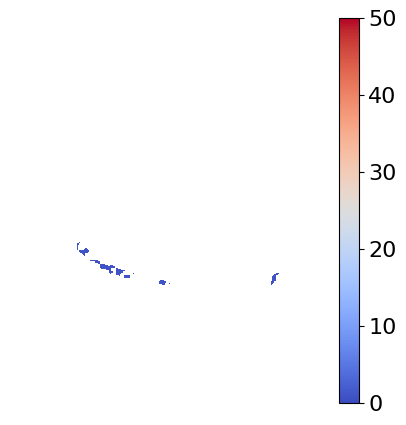

In [17]:
n=20

data = diffmap.get_fdata()[100:350,100:350,n]
vmin = 0
vmax = 50
fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.imshow(data, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.axis('off')
plt.colorbar()

In [18]:
np.unique(diffmap.get_fdata())

array([ 1., nan])

In [ ]:
# ##############################################################################################################################################
# # Step 11: Apply volume threshold to difference maps
# ##############################################################################################################################################
print('Applying volume threshold to difference maps')
for sub_dir in os.listdir(data_path):
    sub_dir_path = os.path.join(data_path, sub_dir)
    
    # session_dirs= os.listdir(sub_dir_path)
    
    idx_dirs= [dir for dir in os.listdir(sub_dir_path) if 'IDX' in dir]
    cl_dirs= [dir for dir in os.listdir(sub_dir_path) if 'CL' in dir]
    
    knee_dirs = [idx_dirs, cl_dirs]
    
    for knee_dir in knee_dirs:
        for session_dir in knee_dir:
            if '6mo' in session_dir:
                dir_path = os.path.join(sub_dir_path, session_dir)       
                difference_map_pos_path = os.path.join(dir_path, 'diff_map_intensity_thresh_pos.nii')
                difference_map_neg_path = os.path.join(dir_path, 'diff_map_intensity_thresh_neg.nii')
                difference_map_vol_pos_path = os.path.join(dir_path, 'diff_map_volume_thresh_pos.nii')
                difference_map_vol_neg_path = os.path.join(dir_path, 'diff_map_volume_thresh_neg.nii')

                if not os.path.exists(difference_map_vol_pos_path):
                    print(f'Applying volume threshold to intensity thresholded positive difference map for {sub_dir}')
                    # Apply intensity threshold
                    diff_map_volume_thresholded_pos = apply_volume_threshold(
                        difference_map_path=difference_map_pos_path, 
                        volume_threshold= 25)
                    nib.save(diff_map_volume_thresholded_pos, difference_map_vol_pos_path)
                    
                if not os.path.exists(difference_map_vol_neg_path):
                    print(f'Applying volume threshold to intensity thresholded negative difference map for {sub_dir}')
                    # Apply intensity threshold
                    diff_map_volume_thresholded_neg = apply_volume_threshold(
                        difference_map_path=difference_map_neg_path, 
                        volume_threshold= 25)
                    nib.save(diff_map_volume_thresholded_neg, difference_map_vol_neg_path)

In [86]:
seg_path ='/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_IDX_6mo_anon/segmentation_reg_fc.nii'
diff_map_path ='/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_IDX_6mo_anon/difference_map.nii'
cluster_map_path = '/dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_IDX_6mo_anon/diff_map_volume_thresh_pos.nii'

data = compute_T2C_metrics(cluster_map_path, diff_map_path)

In [101]:
append_df_to_excel(data= data, data_file_path= '/dataNAS/people/anoopai/DODGR/results/T2C_metrics.xlsx', sheet='T2C_metrics2') 

In [70]:
img = nib.load(seg_path)
header = img.header

# Extract the voxel dimensions
voxel_dimensions = header.get_zooms()

voxel_dimensions[0]

0.31245163

In [71]:
p= [1,2,3,4]
len(p)

4

In [21]:
seg = nib.load(diff_map_path).get_fdata()

# count non-zero voxels
b= np.count_nonzero(seg)
b= np.sum(~np.isnan(seg))
b

20971520

In [9]:
# Revome folders:

import os
import shutil

def remove_specific_files(root_dir):
    """
    Iterate over all folders and files in the given directory and remove files with the specific name.
    
    Parameters:
    - root_dir (str): The root directory to start the search.
    - target_filename (str): The name of the file to be removed.
    """
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            # print(filename)
            if 'T2C_int8.5_vol75_subregions_pos' in filename:
                file_path = os.path.join(dirpath, filename)
                try:
                    os.remove(file_path)
                    # os.rename(file_path, file_path.replace('diff_map_intensity_thresh_pos.nii', 'T2C_int8.5_pos.nii'))
                    print(f'Removed: {file_path}')
                except OSError as e:
                    print(f'Error removing {file_path}: {e}')

        # for dirname in dirnames:
        #     if 'qdess_reg' in dirname :
        #         file_path = os.path.join(dirpath, dirname)
                # try:
                #     shutil.rmtree(file_path)
                #     print(f'Removed: {file_path}')
                # except OSError as e:
                #     print(f'Error removing {file_path}: {e}')

# Specify the root directory and the target filename
root_directory = '/dataNAS/people/anoopai/DODGR/DODGR_data'

# Call the function
remove_specific_files(root_directory)


Removed: /dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_IDX_6mo_anon/T2C_int8.5_vol75_subregions_pos.nii
Removed: /dataNAS/people/anoopai/DODGR/DODGR_data/DODGR022_anon/DODGR022_CL_6mo_anon/T2C_int8.5_vol75_subregions_pos.nii
Removed: /dataNAS/people/anoopai/DODGR/DODGR_data/DODGR044_anon/DODGR044_IDX_6mo_anon/T2C_int8.5_vol75_subregions_pos.nii
